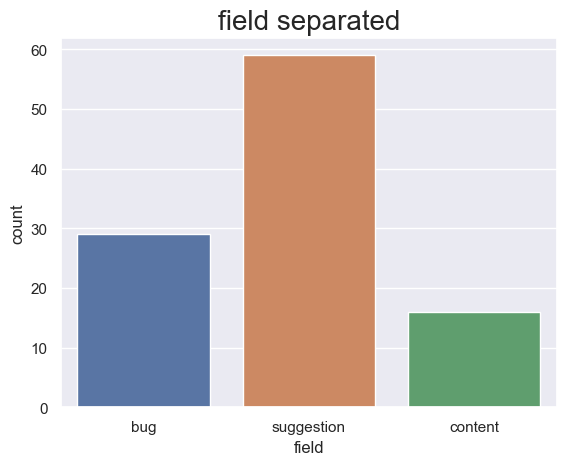

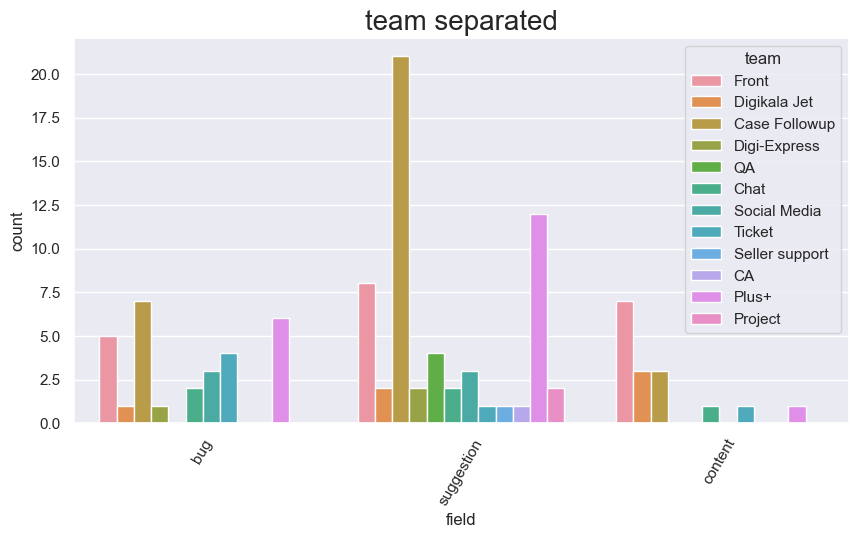

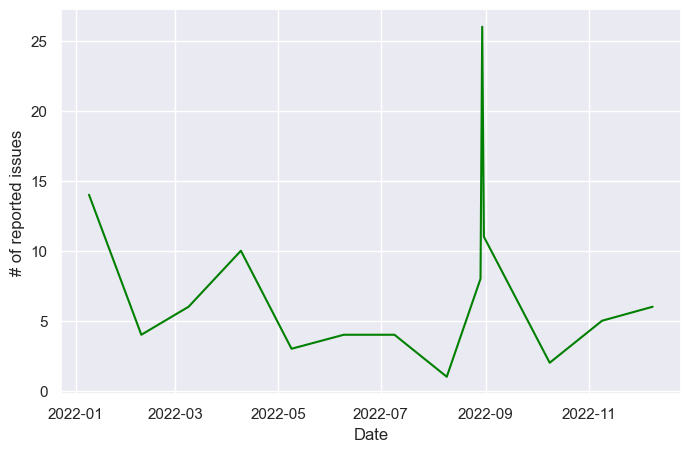

field     bug  content  suggestion
personal                          
11398       2        4           2
11536       0        0           1
12274       1        0           1
1234        1        0           0
12948       0        0           1
13858       0        1           0
15181       0        0           1
15709       1        0           1
15767       2        0           7
1688        0        0           1


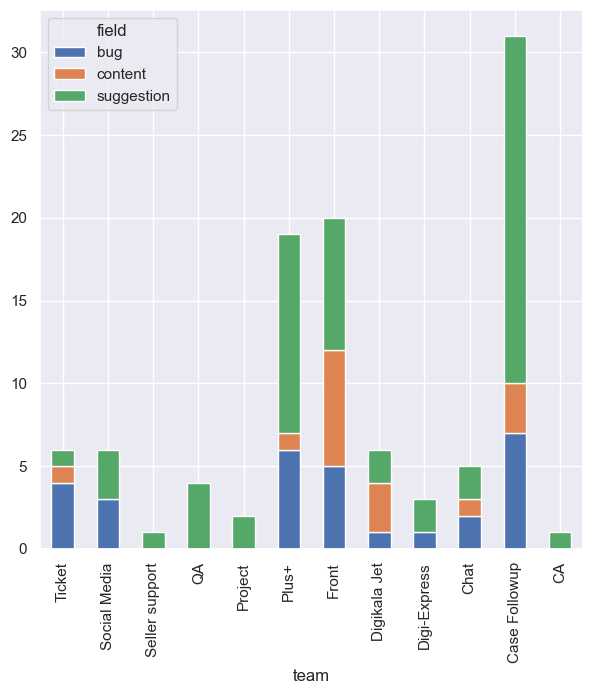

In [19]:
#!/usr/bin/env python
#!coding: utf-8 



import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import pandas as pd
from google.oauth2.credentials import Credentials

from googleapiclient.discovery import build


from google.oauth2 import service_account
def get_sheet(id):
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
    SERVICE_ACCOUNT_FILE = 'keys.json'

    creds = None
    creds = service_account.Credentials.from_service_account_file(
            SERVICE_ACCOUNT_FILE,scopes=SCOPES)

    # If modifying these scopes, delete the file token.json.
    SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

    # The ID and range of a sample spreadsheet.
    SAMPLE_SPREADSHEET_ID = id







    service = build('sheets', 'v4', credentials=creds)


            # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                        range='A:M').execute()
    values = result.get('values', [])
    
    df = pd.DataFrame(values[1:], columns=values[0])
    return df

#get_sheet('1wMi1a_Igifrz4MtM4nsbXA-SAl7Mo9uO85nVpW-rL_Q')

def add_date(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['month']=df['Timestamp'].dt.month
    df['day']=df['Timestamp'].dt.day
    df['year']=df['Timestamp'].dt.year
    return df


def rename(df):
    try:
        df['name'] = df['لطفا نام خود را وارد نمائید'] 
        df['personal'] = df['لطفا کد پرسنلی خود را ثبت نمائید.'] 
        df['team'] = df['لطفا واحدی که در آن مشغول به فعالیت می باشید را انتخاب نمائید.']
        df['description'] = df['لطفا پیشنهاد خود را شرح دهید:']
        df['field'] = df["پیشنهاد شما در چه حوزه ای می باشد؟"]
        df['documentation'] = df['در صورت نیاز به بارگزاری مستندات برای شفافیت موضوع خود، میتوانید از این قسمت استفاده نمائید.']
        df['Timestamp'] = df['Timestamp'].dt.date
    except : pass
    #del df['لطفا نام خود را وارد نمائید'], df['لطفا کد پرسنلی خود را ثبت نمائید.'],df['لطفا واحدی که در آن مشغول به فعالیت می باشید را انتخاب نمائید.'],df['لطفا پیشنهاد خود را شرح دهید:'],df["پیشنهاد شما در چه حوزه ای می باشد؟"],df['در صورت نیاز به بارگزاری مستندات برای شفافیت موضوع خود، میتوانید از این قسمت استفاده نمائید.']
    
    return df


def preprocessing(df):

    #df['peronal'] = df['peronal'].astype(int)
    df['name'] = df['name'].astype(str)
    df['team'] = df['team'].astype(str)
    df['field'] = df['field'].map({'پیشنهاد بهبود (اصلاح رویه- ایجاد رویه جدید)':'suggestion','تولید محتوا':'content','باگ':'bug'})

    
    return df


#!/usr/bin/env python
#coding: utf-8 

def main():
    df = get_sheet('1wMi1a_Igifrz4MtM4nsbXA-SAl7Mo9uO85nVpW-rL_Q')
    df = add_date(df)
    df = rename(df)
    df = preprocessing(df)
    
    sns.countplot(data = df,x = df.field)
    plt.title('field separated',fontsize=20)
    plt.show()
    
    fig=plt.figure(figsize=(10,5))
    ax=sns.countplot(data = df,x = df.field,hue=df.team)
    ax.tick_params(axis='x', rotation=60)
    plt.title('team separated',fontsize=20)
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(df.groupby('Timestamp')['personal'].count(),c='green')
    plt.xlabel('Date')
    plt.ylabel("# of reported issues")
    plt.show()
    df.groupby(["team","field"]).size().unstack().sort_values(by=["team"],ascending=False).plot(kind='bar', stacked=True, figsize=(7,7))

    print(pd.DataFrame(pd.crosstab(df.personal,df.field)).head(10))
   
   
    


if __name__ == '__main__':
    main()
    
    



In [1]:
df = get_sheet('1wMi1a_Igifrz4MtM4nsbXA-SAl7Mo9uO85nVpW-rL_Q')
df = add_date(df)
df = rename(df)
df=preprocessing(df)

NameError: name 'get_sheet' is not defined

In [39]:
df.groupby(["team","field"]).size().unstack()

field,bug,content,suggestion
team,,,
CA,NaN,NaN,1.0
Case Followup,6.0,2.0,17.0
Chat,2.0,1.0,2.0
Digi-Express,1.0,NaN,2.0
Digikala Jet,1.0,3.0,2.0
Front,5.0,7.0,8.0
Plus+,6.0,1.0,10.0
Project,NaN,NaN,2.0
QA,NaN,NaN,1.0


<AxesSubplot:xlabel='team'>

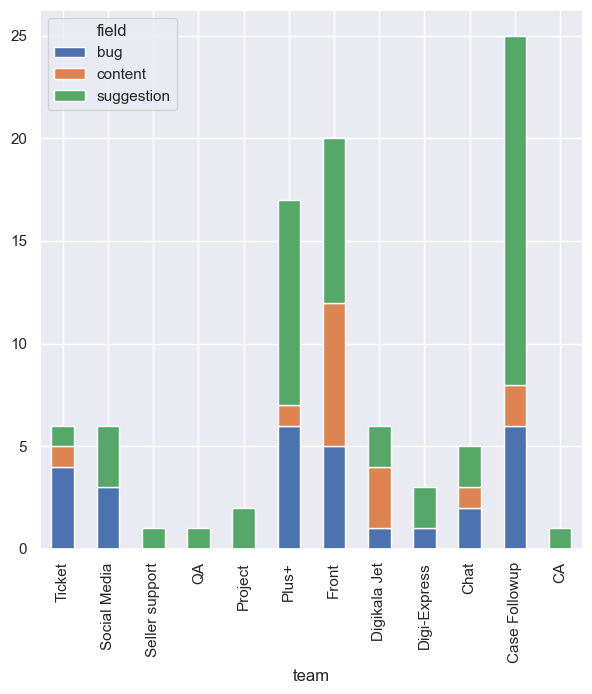

In [56]:
df.groupby(["team","field"]).size().unstack().sort_values(by=["team"],ascending=False).plot(kind='bar', stacked=True, figsize=(7,7))

In [24]:
df = get_sheet('1wMi1a_Igifrz4MtM4nsbXA-SAl7Mo9uO85nVpW-rL_Q')
df.to_csv('df.csv')

In [22]:
df = add_date(df)
df= rename(df)
df = preprocessing(df)
df.to_csv('df.csv')

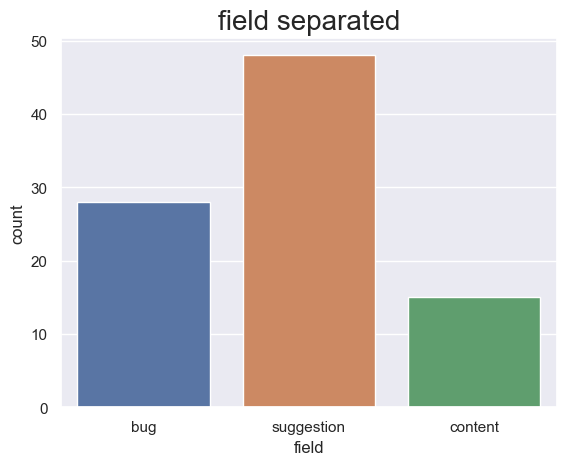

In [12]:
sns.countplot(data = df,x = df.field)
plt.title('field separated',fontsize=20)
plt.show()

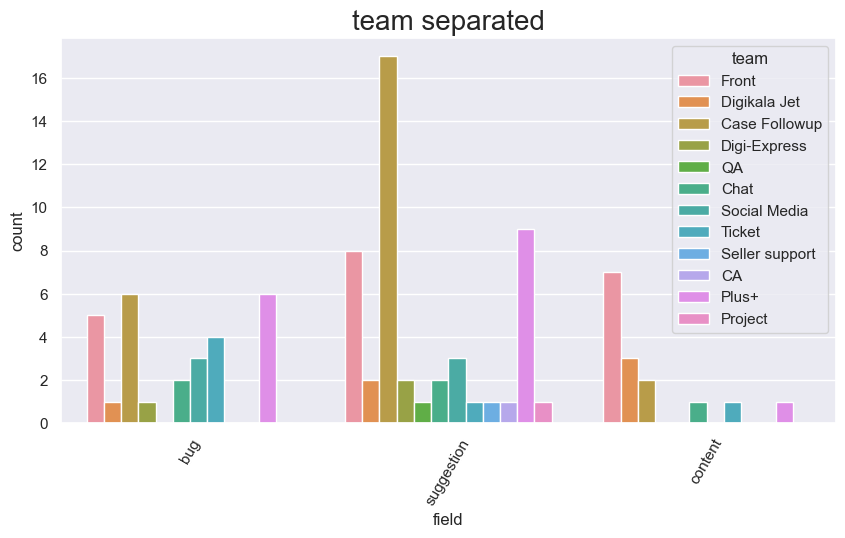

In [42]:
fig=plt.figure(figsize=(10,5))
ax=sns.countplot(data = df,x = df.field,hue=df.team)
ax.tick_params(axis='x', rotation=60)
plt.title('team separated',fontsize=20)
plt.show()

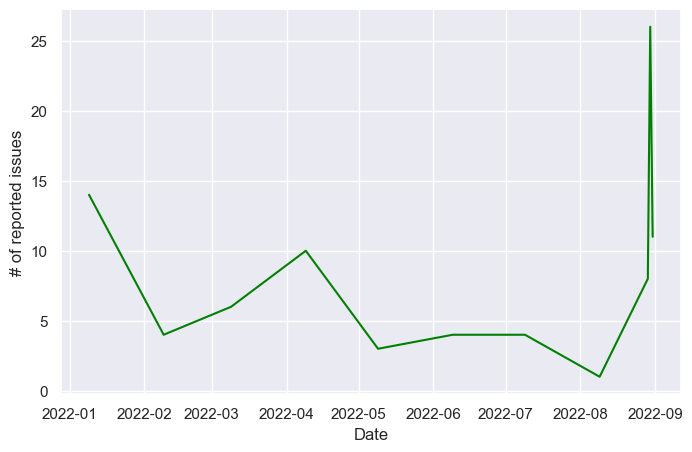

In [34]:
plt.figure(figsize=(8,5))
plt.plot(df.groupby('Timestamp')['personal'].count(),c='green')
plt.xlabel('Date')
plt.ylabel("# of reported issues")
plt.show()

In [120]:
#fig,axes = plt.subplots(2,3,figsize=(12,12),sharex=True,sharey=True)


top = pd.DataFrame(df.personal.value_counts().sort_values(ascending=False))
#top['# of suggested issues till now']=top['personal']
#del top['personal']

#top.index = [x for x in range(1, len(top.personal)+1)]


In [122]:
top['# of suggested issues till now']=top['personal']
del top['personal']

In [66]:
df.groupby(["personal","field"]).size().unstack().sort_values(by=["personal"],ascending=True).head(10)

field,bug,content,suggestion
personal,,,
11398,2.0,4.0,2.0
11536,NaN,NaN,1.0
12274,1.0,NaN,NaN
1234,1.0,NaN,NaN
12948,NaN,NaN,1.0
13858,NaN,1.0,NaN
15181,NaN,NaN,1.0
15709,1.0,NaN,1.0
15767,2.0,NaN,5.0


In [126]:
df.head(2)

,Timestamp,لطفا نام خود را وارد نمائید,لطفا کد پرسنلی خود را ثبت نمائید.,لطفا واحدی که در آن مشغول به فعالیت می باشید را انتخاب نمائید.,پیشنهاد شما در چه حوزه ای می باشد؟,لطفا پیشنهاد خود را شرح دهید:,در صورت نیاز به بارگزاری مستندات برای شفافیت موضوع خود، میتوانید از این قسمت استفاده نمائید.,month,day,year,name,personal,team,description,field,documentation
0,2022-08-29,مستر همفر,1234,Front,باگ,حقوق کمه؛ حقوق ما رو بیشتر کنید همه چی میفته ر...,https://drive.google.com/open?id=1YyYUIUM1zKxx...,8,29,2022,مستر همفر,1234,Front,حقوق کمه؛ حقوق ما رو بیشتر کنید همه چی میفته ر...,bug,https://drive.google.com/open?id=1YyYUIUM1zKxx...
1,2022-08-29,علی بیک پور,7462,Front,پیشنهاد بهبود (اصلاح رویه- ایجاد رویه جدید),I)Objective : Improve CX ( in order to Improve...,https://drive.google.com/open?id=1RhifEHUcwW5a...,8,29,2022,علی بیک پور,7462,Front,I)Objective : Improve CX ( in order to Improve...,suggestion,https://drive.google.com/open?id=1RhifEHUcwW5a...


In [130]:
pd.DataFrame(pd.crosstab(df.personal,df.field)).head(10)

field,bug,content,suggestion
personal,,,
11398,2,4,2
11536,0,0,1
12274,1,0,0
1234,1,0,0
12948,0,0,1
13858,0,1,0
15181,0,0,1
15709,1,0,1
15767,2,0,4


In [167]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
from wordcloud_fa import WordCloudFa


In [174]:
from wordcloud_fa import WordCloudFa
wc = WordCloudFa()

In [175]:
text = 'این یک متن تستی است'

In [176]:
text

'این یک متن تستی است'

In [179]:
from __future__ import unicode_literals
from hazm import *

In [180]:
normalizer = Normalizer()
normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')
'اصلاح نویسه‌ها و استفاده از نیم‌فاصله پردازش را آسان می‌کند'

'اصلاح نویسه\u200cها و استفاده از نیم\u200cفاصله پردازش را آسان می\u200cکند'

In [181]:
word_tokenize('')

['ولی', 'برای', 'پردازش', '،', 'جدا', 'بهتر', 'نیست', '؟']

In [187]:
with open('test.txt', 'r',encoding="utf-8") as file:
    text = file.read()

In [1]:
text = 'اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند'

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [205]:
text = 

In [3]:
text

'اصلاح نويسه ها و استفاده از نیم\u200cفاصله پردازش را آسان مي كند'

In [4]:
wordcloud = WordCloud().generate(text)

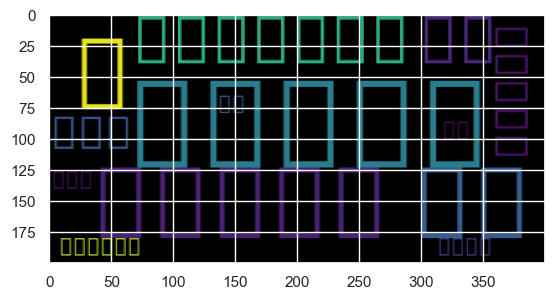

In [7]:
plt.imshow(wordcloud)

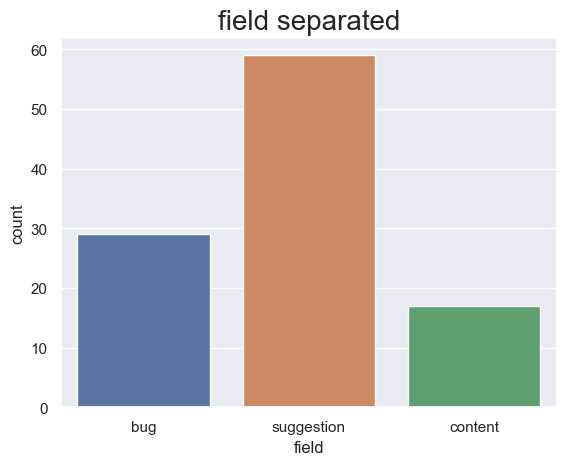

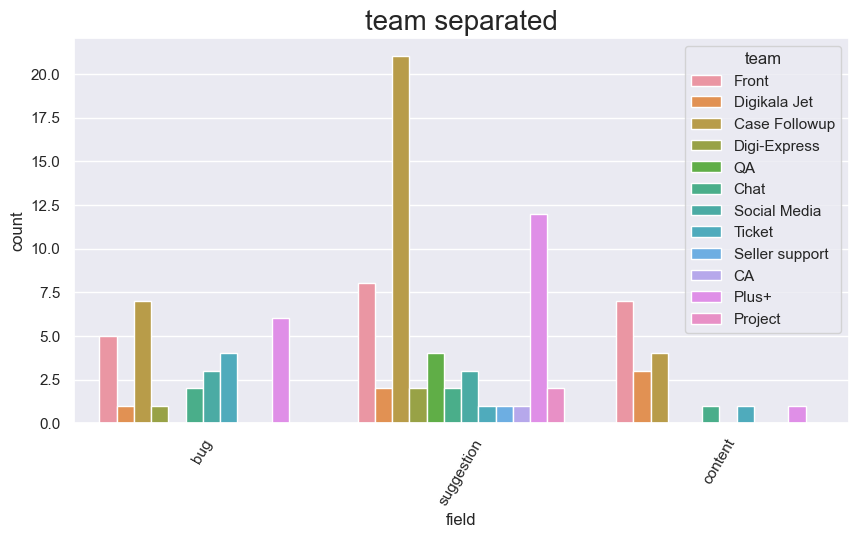

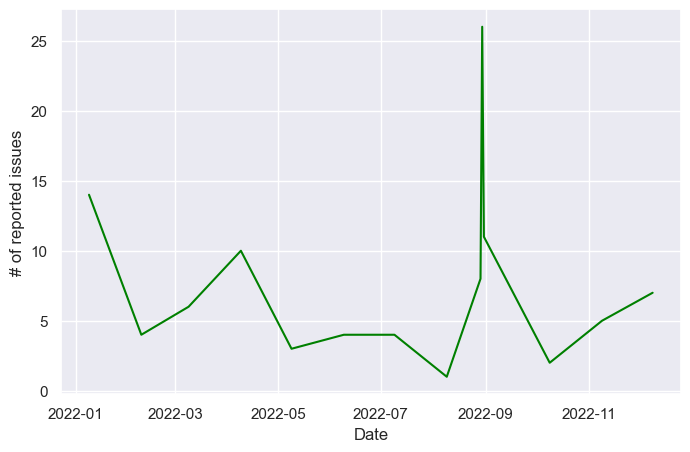

field     bug  content  suggestion
personal                          
11398       2        4           2
11536       0        0           1
12274       1        0           1
1234        1        0           0
12948       0        0           1
13858       0        1           0
15181       0        0           1
15709       1        0           1
15767       2        0           7
1688        0        0           1


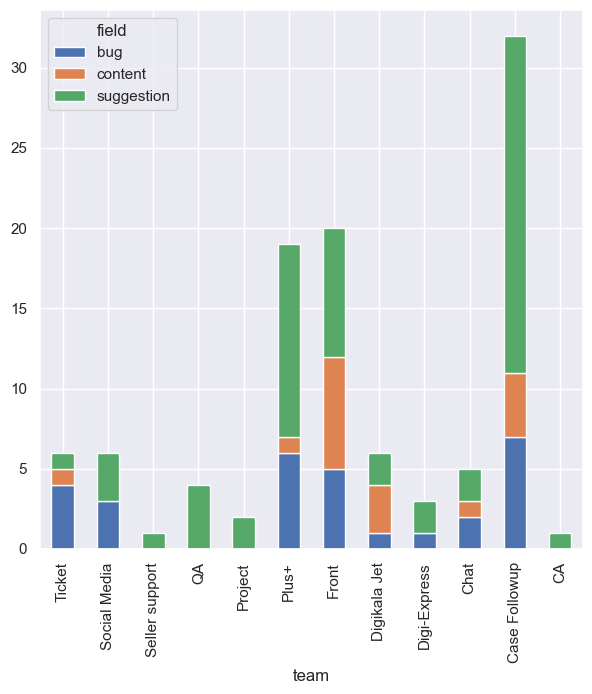

In [27]:
     
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json
import pandas as pd
from google.oauth2.credentials import Credentials

from googleapiclient.discovery import build



#get_sheet('1wMi1a_Igifrz4MtM4nsbXA-SAl7Mo9uO85nVpW-rL_Q')

def add_date(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['month']=df['Timestamp'].dt.month
    df['day']=df['Timestamp'].dt.day
    df['year']=df['Timestamp'].dt.year
    return df


def rename(df):
    try:
        df['name'] = df['لطفا نام خود را وارد نمائید'] 
        df['personal'] = df['لطفا کد پرسنلی خود را ثبت نمائید.'] 
        df['team'] = df['لطفا واحدی که در آن مشغول به فعالیت می باشید را انتخاب نمائید.']
        df['description'] = df['لطفا پیشنهاد خود را شرح دهید:']
        df['field'] = df["پیشنهاد شما در چه حوزه ای می باشد؟"]
        df['documentation'] = df['در صورت نیاز به بارگزاری مستندات برای شفافیت موضوع خود، میتوانید از این قسمت استفاده نمائید.']
        df['Timestamp'] = df['Timestamp'].dt.date
    except : pass
    #del df['لطفا نام خود را وارد نمائید'], df['لطفا کد پرسنلی خود را ثبت نمائید.'],df['لطفا واحدی که در آن مشغول به فعالیت می باشید را انتخاب نمائید.'],df['لطفا پیشنهاد خود را شرح دهید:'],df["پیشنهاد شما در چه حوزه ای می باشد؟"],df['در صورت نیاز به بارگزاری مستندات برای شفافیت موضوع خود، میتوانید از این قسمت استفاده نمائید.']
    
    return df


def preprocessing(df):

    #df['peronal'] = df['peronal'].astype(int)
    df['name'] = df['name'].astype(str)
    df['team'] = df['team'].astype(str)
    df['field'] = df['field'].map({'پیشنهاد بهبود (اصلاح رویه- ایجاد رویه جدید)':'suggestion','تولید محتوا':'content','باگ':'bug'})

    
    return df




def main():
    df = pd.read_csv('df.csv')
    df = add_date(df)
    df = rename(df)
    df = preprocessing(df)
    
    sns.countplot(data = df,x = df.field)
    plt.title('field separated',fontsize=20)
    plt.show()
    
    fig=plt.figure(figsize=(10,5))
    ax=sns.countplot(data = df,x = df.field,hue=df.team)
    ax.tick_params(axis='x', rotation=60)
    plt.title('team separated',fontsize=20)
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(df.groupby('Timestamp')['personal'].count(),c='green')
    plt.xlabel('Date')
    plt.ylabel("# of reported issues")
    plt.show()
    df.groupby(["team","field"]).size().unstack().sort_values(by=["team"],ascending=False).plot(kind='bar', stacked=True, figsize=(7,7))

    print(pd.DataFrame(pd.crosstab(df.personal,df.field)).head(10))
    
    
    


if __name__ == '__main__':
    main()